### Dua Batool

In [2]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Q1

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

Article link: https://www.dailymail.co.uk/sport/football/article-10723951/Thibaut-Courtois-claims-Barcelonas-4-0-demolition-Real-Madrid-month-FLUKE.html

In [6]:
ny_bb = url_to_string('https://www.dailymail.co.uk/sport/football/article-10723951/Thibaut-Courtois-claims-Barcelonas-4-0-demolition-Real-Madrid-month-FLUKE.html')
article = nlp(ny_bb)
len(article.ents)

761

The article has 761 entities.

In [7]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 178,
         'CARDINAL': 74,
         'DATE': 61,
         'WORK_OF_ART': 8,
         'PERSON': 254,
         'MONEY': 15,
         'GPE': 93,
         'PRODUCT': 5,
         'NORP': 23,
         'LAW': 3,
         'ORDINAL': 18,
         'FAC': 10,
         'EVENT': 8,
         'TIME': 7,
         'PERCENT': 1,
         'LOC': 1,
         'LANGUAGE': 1,
         'QUANTITY': 1})

In [8]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Man United', 18), ('Liverpool', 16), ('Barcelona', 13)]

In [9]:
sentences = [x for x in article.sents]
print(sentences[7])

as Spurs have league's WORST discipline Bradley Wiggins explains he 'doesn't ride a bike anymore' because the eight-time Olympian 'didn't like the person he became'... and reveals the 'haunting' day his estranged father told him 'you'll never be as good as your old man'


In [10]:
displacy.render(nlp(str(sentences[7])), jupyter=True, style='ent')

In [11]:
dict([(str(x), x.label_) for x in nlp(str(sentences[7])).ents])

{'Spurs': 'ORG',
 'Bradley Wiggins': 'PRODUCT',
 'eight': 'CARDINAL',
 'Olympian': 'NORP',
 "' day": 'DATE'}

Error in algorithm as Bradley Wiggins is not a product, it is a person.

#### Lemmatization

In [12]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[7])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('Spurs', 'NOUN', 'spur'),
 ('league', 'NOUN', 'league'),
 ('WORST', 'ADJ', 'bad'),
 ('discipline', 'NOUN', 'discipline'),
 ('Bradley', 'PROPN', 'Bradley'),
 ('Wiggins', 'PROPN', 'Wiggins'),
 ('explains', 'VERB', 'explain'),
 ("'", 'AUX', "'"),
 ('ride', 'VERB', 'ride'),
 ('bike', 'NOUN', 'bike'),
 ('anymore', 'ADV', 'anymore'),
 ('time', 'NOUN', 'time'),
 ('Olympian', 'PROPN', 'Olympian'),
 ('like', 'VERB', 'like'),
 ('person', 'NOUN', 'person'),
 ('reveals', 'VERB', 'reveal'),
 ('haunting', 'VERB', 'haunt'),
 ('day', 'NOUN', 'day'),
 ('estranged', 'ADJ', 'estranged'),
 ('father', 'NOUN', 'father'),
 ('told', 'VERB', 'tell'),
 ('good', 'ADJ', 'good'),
 ('old', 'ADJ', 'old'),
 ('man', 'NOUN', 'man')]

In [13]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

There are a few errors in the algorithm 

### Q2

In [16]:
from tika import parser

In [17]:
raw = parser.from_file('journal.pone.0244780.pdf')

#### Technique 1

In [18]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)

In [20]:
filtered_word_freq.most_common(25)

[('https', 135),
 ('COVID-19', 110),
 ('towards', 63),
 ('knowledge', 62),
 ('public', 59),
 ('study', 58),
 ('Ethiopia', 55),
 ('Addis', 54),
 ('Ababa', 53),
 ('attitude', 47),
 ('practice', 38),
 ('pandemic', 37),
 ('//doi.org/10.1371/journal.pone.0244780', 36),
 ('participants', 36),
 ('PLOS', 33),
 ('ONE', 33),
 ('response', 32),
 ('http', 31),
 ('service', 30),
 ('providers', 27),
 ('January', 24),
 ('information', 24),
 ('among', 23),
 ('Health', 22),
 ('washing', 22)]

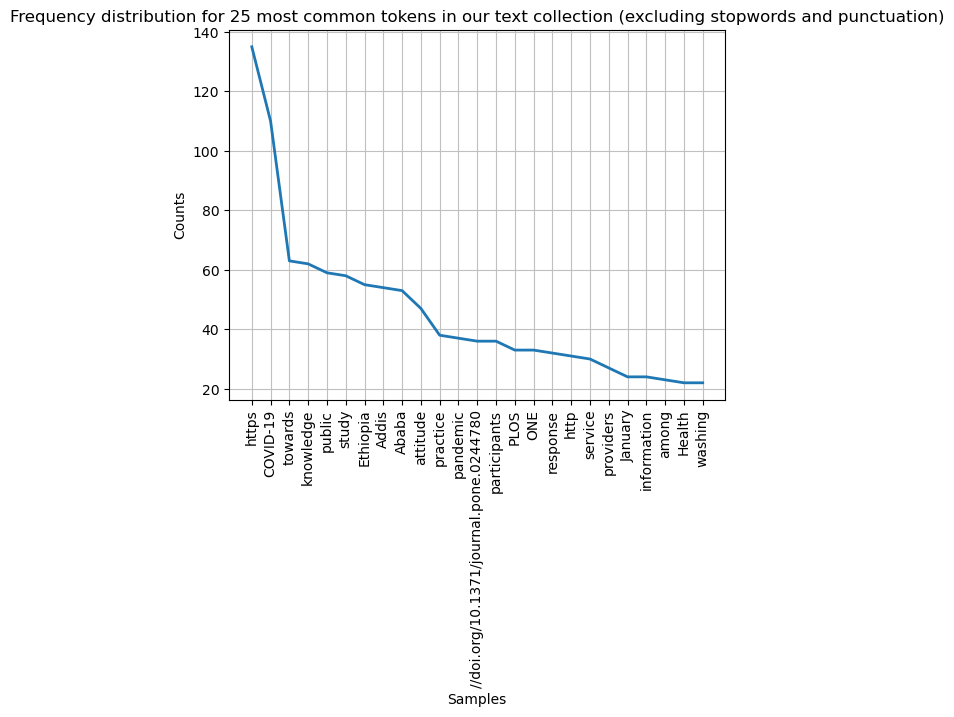

<Axes: title={'center': 'Frequency distribution for 25 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [21]:
filtered_word_freq.plot(25,title='Frequency distribution for 25 most common tokens in our text collection (excluding stopwords and punctuation)')

The graph is for word frequency of top 25 words in the pdf. At the top we have "https" with frequency between 130-140 and the second most common word is "COVID-19" with frequency around 110.

#### Technique 2

In [22]:
import yake

In [23]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Addis Ababa Ethiopia', 5.286600939226229e-05)
('Ababa Ethiopia PLOS', 7.729033423301274e-05)
('Addis Ababa', 0.0001559317626918379)
('School of Medicine', 0.000179480706192004)
('Addis Ababa University', 0.0002651135467359795)
('Child Health Department', 0.0003879358839455488)
('Ababa Ethiopia', 0.0005814853867015348)
('Ethiopia PLOS', 0.0008285862544465141)
('Addis', 0.0016579679021168953)
('Ethiopia', 0.001717234509124864)
('Ababa', 0.0017273895336404148)
('Knowledge', 0.0019620504308132313)
('Internal Medicine', 0.0022261113487808985)
('Sciences Addis Ababa', 0.0025039021189245505)
('public', 0.0027231273722622957)
('public KAP', 0.0027540188454672904)
('Ababa University', 0.0028750517040273572)
('Department of Microbiology', 0.0029623521073671674)
('Department of Psychiatry', 0.0029623521073671674)
('Department of Surgery', 0.0029623521073671674)


The above results shows the most important keywords in the pdf. The results show that most important keyword according to Yake algorithm is "Addis Ababa Ethiopia"

#### Technique 3

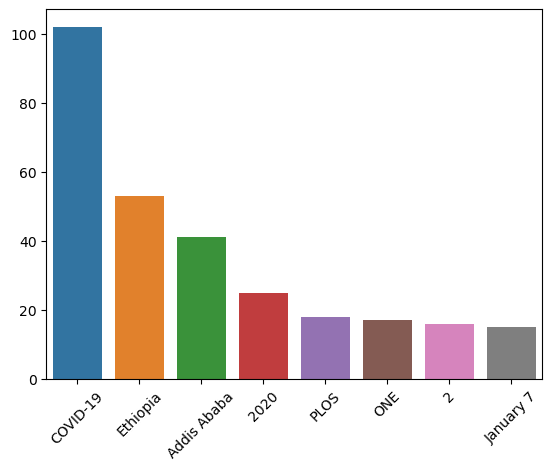

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt  

doc = nlp(raw['content'].strip('\n'))
items = [x.text for x in doc.ents]
output = Counter(items).most_common(8)

x = [i[0] for i in output]
y = [i[1] for i in output]

# PLOTTING
ax = sns.barplot(x=x, y=y)  
plt.xticks(rotation=45) 
plt.show() 

Word count accoridng to Spacy. COVID-19 has appeard around 100 times in the pdf.

### Q3

In [25]:
# import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

In [26]:
with open('tweets.txt', 'r', encoding='utf-8') as file:
    tweets = file.readlines()

In [27]:
positive_count = 0
negative_count = 0

for tweet in tweets:
    analysis = TextBlob(tweet)
    # Classify polarity as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        positive_count += 1
    elif analysis.sentiment.polarity < 0:
        negative_count += 1

In [28]:
positive_count

3

In [29]:
negative_count

1

In [30]:
positive_tweet = next((tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity > 0), None)
negative_tweet = next((tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity < 0), None)

In [32]:
print('\nPositive Tweet:')
print(positive_tweet)


Positive Tweet:
1.51617E+18 "Some BOT dance for us Robots ðŸ˜œðŸ¤–ðŸ™ˆðŸ’ƒ Baby do you love me ? #Ø§Ù…Ù¾ÙˆØ±Ù¹Úˆ_Ø­Ú©ÙˆÙ…Øª_Ù†Ø§Ù…Ù†Ø¸ÙˆØ± https://t.co/ZtwdTg4RbF #RobotsofKhan #bots of #PTI" 1 1 Mon Apr 18 22:00:54 +0000 2022



In [33]:
print('\nNegative Tweet:')
print(negative_tweet)


Negative Tweet:
1.51618E+18 "@iihtishamm Ye sb hm Bots ki mehnat ki kamai haiðŸ¤£ðŸ¤£ðŸ¤£ wonder how come @Marriyum_A come up with such silly logicsâ€¦ https://t.co/zd5X7l2r9Q" 0 0 Mon Apr 18 22:01:52 +0000 2022



I think the sentiment analysis is accurate to some extent as in the positive tweet, we can say that it recognized the word love and categorized it as a positive tweet. Similarly, in the negative tweet it found 'silly logic' and categorized it as negative.